# <span style="color:#D65DB1"> Decision Tree Classifier to predict the **Global Score** </span>

The innput will be the CER score, and the output is the number 1 to 5.
The Clasefier is a Decision Tree from sklearn library.

Implementation:
1)  Get the CER from the assesment file. 
    This is calculated using pronScores.
2)  Make a new df wher the assesment 'CER' and global 'Score' is.
3)  Split the df into traing and testing data.
4)  Initilize a Decision Tree Classifier
5)  Train the classefier, and test it.
6)  Opimize the model if needed
7)  Change the predicted Score in the transcribed files and update the CSV and results.

For 'Score' 5 where 'CER' is more than 0.0, is one incstand at index 7115. With the CER score of 0.333333.

<!-- 
# Code
filtered_df = input_assesmen[(input_assesmen['Score'] == 5) & (input_assesmen['CER'] > 0)]
print("\nFiltered rows where 'Score' is 5 and 'CER' is greater than 0:\n", filtered_df) 
->

<!-- 
# Test for forståelse
# df_assesment.loc[0]
# print(len(df_assesment['Pronunciation'].loc[0].split(' ')))
# print(len(df_assesment['pronScores'].loc[0].split(' ')))
# pronScore =  df_assesment['pronScores'].loc[0].split(' ')
# CER = pronScore.count('0')/len(df_assesment['pronScores'].loc[0].split(' '))

# print(CER)
# print(pronScore)
# print(pronScore.count('0'))
# print(pronScore.count('1'))
# # Double check that the len of the pronScore is the same as the len of the Pronunciation
# for idx, row in df_assesment.iterrows():
#     pron = len(row['Pronunciation'].split(' '))
#     pronScor = len(row['pronScores'].split(' '))
#     if pron != pronScor:
#         print('index', idx)
#         print('Pronunciation', pron)
#         print('pronScores', pronScor) 
-->


<!-- Colors: 

<b><span style="color:#7ABCDD">7ABCDD</span></b>
<b><span style="color:#57D0E2">57D0E2</span></b>
<b><span style="color:#4DE1D4">4DE1D4</span></b>

<b><span style="color:#77EFB6">77EFB6</span></b>
<b><span style="color:#B4F790">B4F790</span></b>
<b><span style="color:#F9F871">F9F871</span></b>

<b><span style="color:#D4A5CA">D4A5CA</span></b>
<b><span style="color:#FBA8C2">FBA8C2</span></b>
<b><span style="color:#FFAFAC">FFAFAC</span></b>
<b><span style="color:#FFC08F">FFC08F</span></b>
<b><span style="color:#FFDA77">FFDA77</span></b>
<b><span style="color:#F9F871">F9F871</span></b>

<b><span style="color:#845EC2">845EC2</span></b>
<b><span style="color:#D65DB1">D65DB1</span></b>
<b><span style="color:#FF6F91">FF6F91</span></b> 

<b><span style="color:#FF9671">FF9671</span></b>
<b><span style="color:#FFC75F">FFC75F</span></b>
<b><span style="color:#F9F871">F9F871</span></b>

<b><span style="color:#845EC2">845EC2</span></b>
<b><span style="color:#2C73D2">2C73D2</span></b>
<b><span style="color:#0081CF">0081CF</span></b>
<b><span style="color:#0089BA">0089BA</span></b>
<b><span style="color:#008E9B">008E9B</span></b>
<b><span style="color:#008F7A">008F7A</span></b> -->

## <span style="color:#FF6F91"> Data observations: </span>  

The dataset is <b>unbalanced</b>. 
Instances of 'Score' 4 is highest for the same group as 'Score' 5. 

'Score' 4 is never the highest number for each of the CER scores, so it will not be classified for most models. 

This means in the reality that <b>the model will only be able to predict 'Score' 1, 2, 3 and 5</b>, where most of them is the lower scores.

In [125]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from matplotlib.colors import LinearSegmentedColormap # From ChatGPT to get custom cm colors
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from prettytable import PrettyTable
import self_made_functions as smf 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os 




df_assessment, wv_path = smf.get_correct_df()

# # File name	Score	Prosody	Noise/Disruption	Pre-speech noise	Repetition	Word	Pronunciation	pronScores	Assessor
csv_df  = pd.read_csv('Transcriptions/transcriptions_nb-whisper-medium-verbatim_v1.csv') # Test for 1 file first

## <span style="color:#FF9671">Check Empty Transcriptions is in Transcription

In [126]:
result_path = './Correct_Transcriptions'
transcription_lst = os.listdir(result_path)
transcription_lst = [file for file in transcription_lst if file.startswith('true')]

for file in transcription_lst:
    # print(file)
    csv_df  = pd.read_csv(f'{result_path}/{file}')
    if file.startswith('true_t'):
        if csv_df['transcribed_word'].isnull().sum() > 0:
            print(f'nan, {file}')
    else: 
        if csv_df['transcribed_word'].isnull().sum() > 0:
            print(f'nan, {file}')

nan, true_transcription_nb-whisper-base_v1.csv
nan, true_transcription_nb-whisper-base-verbatim_v1.csv
nan, true_transcription_nb-whisper-medium_v1.csv
nan, true_transcription_nb-whisper-medium-verbatim_v1.csv


## <span style="color:#FFC75F"> Classical Decision Tree  ➺ ➺ ➺ 

For all the models, as well as the target words

<span style="color:#F9F871"> target_word ➝ PER

<span style="color:#F9F871"> transcribed_word ➝ CER

<span style="color:#F9F871"> transcribed_word_striped ➝ striped_CER

In [127]:
per_colors = [ '#fff4df', '#ffe3af', '#ffd88f', '#ffc75f', '#e6b04f', '#cc9940', '#b38230', '#996a20', '#805210', '#663b00']
per_colors = LinearSegmentedColormap.from_list("custom_cmap", per_colors)

openai_colors =  [ '#f7fbe5', '#e2f1ba', '#cce68f', '#b6db64', '#a8bb5c', '#8ca447', '#708d32', '#54761d', '#385f08', '#1c4800']
openai_colors = LinearSegmentedColormap.from_list("custom_cmap", openai_colors)

nnl_colors = [ '#e5f7f6', '#b8ebe9', '#8adedd', '#5cd2d1', '#20887a', '#1b7064', '#15584e', '#103f38',  '#0b2722', '#06100c']
nl_colors = LinearSegmentedColormap.from_list("custom_cmap", nnl_colors)

verbatim_colors = [ '#e5ebf0',  '#b8c5cf',  '#8a9fae',  '#5d798d',  '#2f4858',  '#273b47',  '#1f2d36',  '#172024',  '#0f1313',  '#070606']
verbatim_colors = LinearSegmentedColormap.from_list("custom_cmap", verbatim_colors)

/home/ajtruyen/anaconda3/envs/master_amanda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


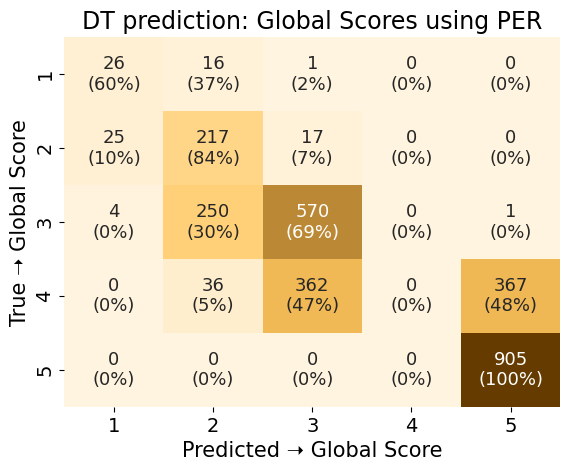

In [128]:
# First try it for the target words
target_csv = pd.read_csv('./Correct_Transcriptions/true_transcription_nb-whisper-medium-verbatim_v1.csv')

# Split data into X (features) and y (labels)
X = target_csv[['PER']]
y = target_csv['global_score'].astype(int) 

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Ensure all Global scores are represented in the data, and in the test and traing set
# print(f"Unique classes in y: {y.unique()}")
# print(f"Value counts in y: {y.value_counts()}, \n")
# print(f"Value counts in y_train: {y_train.value_counts()}, \n")
# print(f"Value counts in y_test: {y_test.value_counts()}, \n")


dt_clf = DecisionTreeClassifier(random_state=42, class_weight='balanced') 

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
# print(classification_report(y_test, y_pred))
# print(type(classification_report(y_test, y_pred)))

# plot confusion matrix 
cm = confusion_matrix(y_test, y_pred, labels=dt_clf.classes_)


# Used ChatGPT to introduce the precentages in the heat mat togeter whit the numbers
# Calculate the percentages
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_percentage = cm / cm_sum.astype(float) * 100

# Create the annotations
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        annot[i, j] = f'{cm[i, j]}\n({cm_percentage[i, j]:.0f}%)'
        
# --- End of GPT code
# --------- Plot heatmap and save to dir ------- #
plt.Figure(figsize=(6, 6))
sns.heatmap(cm, annot=annot, fmt='', cmap=per_colors, 
            annot_kws={"size": 13}, cbar=False,
            xticklabels=dt_clf.classes_, yticklabels=dt_clf.classes_)

lab = 15
tic = 14
plt.xlabel('Predicted ➝ Global Score', fontsize=lab)
plt.ylabel('True ➝ Global Score', fontsize=lab)
plt.xticks(fontsize=tic)
plt.yticks(fontsize=tic)

plt.title('DT prediction: Global Scores using PER', fontsize=lab+2)
# plt.show()

# save_dri = './CM_DT_plots'
# if not os.path.exists(save_dri):
#     os.makedirs(save_dri)
# save_name = 'DecisionTreeClassifier_PER_Target_Words.png'
# plt.savefig(f'{save_dri}/{save_name}')

# plt.close()
average = 'weighted'
accuracy = np.round(accuracy_score(y_test, y_pred), 2)
precision = np.round(precision_score(y_test, y_pred, average=average), 2)
recall = np.round(recall_score(y_test, y_pred, average=average), 2)
f1 = np.round(f1_score(y_test, y_pred, average=average), 2)
mean = np.round(np.mean([accuracy, precision, recall, f1]), 2)


table = PrettyTable() 
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-score", "Metric Mean", "Median PER/CER"]
table.add_row(["Target Words", accuracy, precision, recall, f1, mean, np.round(target_csv['PER'].median(), 2)])

## <span style="color:#B4F790"> Plotting all CM for all models: **Decision Three Classier**

Use the modified data

In [129]:
def check_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

In [130]:
save_dri = './CM_DT_plots'
check_dir(save_dri)

dt_clf = DecisionTreeClassifier(random_state=42, class_weight='balanced') 

for file in transcription_lst:
    csv_file = pd.read_csv(f'{result_path}/{file}')
    
    # Change model name
    model_name = csv_file['model_name'][0]
    if 'verbatim' in model_name:  
        split = model_name.split('-')[2:]
        model_name = f'NNL-{('-'.join(split))}'
    elif 'nb' in model_name:
        split = model_name.split('-')[2]
        model_name = f'NNL-{(split)}'
    else:
        model_name = model_name.capitalize()
    
    # Data preparation
    X = csv_file[['striped_CER']]
    # X = csv_file[['CER']]
    y = csv_file['global_score'].astype(int) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)    
    
    # Train & Predict
    dt_clf.fit(X_train, y_train)
    y_pred = dt_clf.predict(X_test)

    # Set colors form CM
    if 'verbatim' in model_name:
        colors = verbatim_colors
    elif 'NNL' in model_name:
        colors = nnl_colors
    else: colors = openai_colors
        
    # Plot confusion matrix 
    cm = confusion_matrix(y_test, y_pred, labels=dt_clf.classes_)
    
    # Used ChatGPT to introduce the precentages in the heat mat togeter whit the numbers
    # Calculate the percentages
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_percentage = cm / cm_sum.astype(float) * 100

    # Create the annotations
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            annot[i, j] = f'{cm[i, j]}\n({cm_percentage[i, j]:.0f}%)'
            
    # --- End of GPT code
    
    plt.Figure(figsize=(6, 6))
    sns.heatmap(cm, annot=annot, fmt='', cmap=colors, 
                xticklabels=dt_clf.classes_, yticklabels=dt_clf.classes_, 
                annot_kws={"size": 13}, cbar=False)
    
    lab = 17
    tic = 13
    plt.xlabel('Predicted ➝ Global Score', fontsize=lab)
    plt.ylabel('True ➝ Global Score', fontsize=lab)
    plt.xticks(fontsize=tic)
    plt.yticks(fontsize=tic)

    # plt.title(f'DecisionTreeClassifier: CER for Transcribed Words (MT) \n{model_name}')
    plt.title(f'Model: {model_name}', fontsize = lab)

    # Save the plot
    # save_name = f'DecisionTreeClassifier_CER_UnModified_{model_name}.png'
    save_name = f'DecisionTreeClassifier_CER_Modified_{model_name}.png'
    
    plt.savefig(f'{save_dri}/{save_name}', bbox_inches='tight')
    plt.close()
    # plt.show()
    
    # calculate  accuracy_score, precision_score, recall_score, f1_score,
    average = 'weighted'
    accuracy = np.round(accuracy_score(y_test, y_pred), 2)
    precision = np.round(precision_score(y_test, y_pred, average=average), 2)
    recall = np.round(recall_score(y_test, y_pred, average=average), 2)
    f1 = np.round(f1_score(y_test, y_pred, average=average), 2)
    # mean = np.round((accuracy + precision + recall + f1) / 4, 2)
    mean = np.round(np.mean([accuracy, precision, recall, f1]), 2) # Mean NNL-medium og NNL-medium-verbatim er prikk like!
    
    table.add_row([model_name, accuracy, precision, recall, f1, mean, np.round(csv_file['striped_CER'].median(), 2)])
    # table.add_row([model_name, accuracy, precision, recall, f1, mean, np.round(csv_file['CER'].median(), 3)])

## <span style="color:#77EFB6"> **Metrics** for all the models in one table

In [133]:
# table.sortby = 'mean'
table

Model,Accuracy,Precision,Recall,F1-score,Metric Mean,Median PER/CER
Target Words,0.61,0.45,0.61,0.52,0.55,0.17
Base,0.21,0.3,0.21,0.24,0.24,0.6
Medium,0.22,0.34,0.22,0.24,0.255,0.5
NNL-base,0.36,0.4,0.36,0.33,0.36250000000000004,0.25
NNL-base-verbatim,0.35,0.37,0.35,0.33,0.35,0.33
NNL-medium,0.38,0.38,0.38,0.34,0.37000000000000005,0.0
NNL-medium-verbatim,0.36,0.44,0.36,0.32,0.37000000000000005,0.17
NNL-tiny,0.29,0.37,0.29,0.28,0.3075,0.33
NNL-tiny-verbatim,0.28,0.35,0.28,0.28,0.2975,0.5
Tiny,0.22,0.31,0.22,0.25,0.25,0.67


In [132]:
# Get the sorted table as a string
table_str = table.get_string(sortby="Metric Mean", reversesort=True)

# Convert PrettyTable string to LaTeX tabular format
latex_tabular = "\\begin{table}[h]\n"
latex_tabular += "\\centering\n"
latex_tabular += "\\begin{tabular}{>{\centering\\arraybackslash}p{2.5cm}|c|c|c|c|>{\centering\\arraybackslash}p{2cm}|>{\centering\\arraybackslash}p{2cm}}\n"  # Modified table format
latex_tabular += "\n"

# Append header row
headers = table.field_names
latex_tabular += "\\textbf{" + "} & \\textbf{".join(headers) + "} \\\\\n"
latex_tabular += "\\hline\n"

# Append data rows
rows = table_str.splitlines()[3:-1]  # Skip the header and footer
for i, row in enumerate(rows):
    if i == len(rows) - 1:
        latex_tabular += row.replace(' + ', ' & ').replace(' | ', ' & ').replace(' |', ' \\\\ \n')
    else:
        latex_tabular += row.replace(' + ', ' & ').replace(' | ', ' & ').replace(' |', ' \\\\ \\hline\n')

latex_tabular += "\n"
latex_tabular += "\\end{tabular}\n"
latex_tabular += "\\caption{Your caption here.}\n"
latex_tabular += "\\label{tab:mytable}\n"
latex_tabular += "\\end{table}"

# Print the LaTeX tabular
print(latex_tabular)

\begin{table}[h]
\centering
\begin{tabular}{>{\centering\arraybackslash}p{2.5cm}|c|c|c|c|>{\centering\arraybackslash}p{2cm}|>{\centering\arraybackslash}p{2cm}}

\textbf{Model} & \textbf{Accuracy} & \textbf{Precision} & \textbf{Recall} & \textbf{F1-score} & \textbf{Metric Mean} & \textbf{Median PER/CER} \\
\hline
|     Target Words    &   0.61   &    0.45   &  0.61  &   0.52   &         0.55        &      0.17      \\ \hline
| NNL-medium-verbatim &   0.36   &    0.44   &  0.36  &   0.32   & 0.37000000000000005 &      0.17      \\ \hline
|      NNL-medium     &   0.38   &    0.38   &  0.38  &   0.34   & 0.37000000000000005 &      0.0       \\ \hline
|       NNL-base      &   0.36   &    0.4    &  0.36  &   0.33   & 0.36250000000000004 &      0.25      \\ \hline
|  NNL-base-verbatim  &   0.35   &    0.37   &  0.35  &   0.33   &         0.35        &      0.33      \\ \hline
|       NNL-tiny      &   0.29   &    0.37   &  0.29  &   0.28   &        0.3075       &      0.33      \\ \hline
| 

<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_3680446/1986789839.py:7: SyntaxWarning: invalid escape sequence '\c'
  latex_tabular += "\\begin{tabular}{>{\centering\\arraybackslash}p{2.5cm}|c|c|c|c|>{\centering\\arraybackslash}p{2cm}|>{\centering\\arraybackslash}p{2cm}}\n"  # Modified table format


## <span style="color:#4DE1D4"> Every model class in **subplot** 3x1

In [137]:
import matplotlib.image as mpimg

# Path to the directory containing confusion matrix images
path = 'CM_DT_plots'

# List all files in the directory
files = [f for f in os.listdir(path) if (f.endswith('.png')) & ('CER' in f) & ('Decision' in f)]
files = [f for f in files if '_Modified' in f]

test_for_models = ['Tiny', 'NNL-tiny', 'NNL-tiny-verbatim',
                    'Base', 'NNL-base', 'NNL-base-verbatim',
                    'Medium', 'NNL-medium', 'NNL-medium-verbatim']
files = sorted(files, key=lambda x: test_for_models.index(x.split('_')[-1].split('.')[0]))

# test = 'medium'
# test = 'base'
test = 'tiny'

files = [f for f in files if test in f or test.capitalize() in f]

# Number of images
num_images = len(files)

# Determine the number of rows and columns for the subplots
rows = int(num_images ** 0.5)
cols = (num_images + rows - 1) // rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

# Load and plot each image
for ax, file in zip(axes.flatten(), files):
    img = mpimg.imread(os.path.join(path, file))
    ax.imshow(img)
    ax.axis('off')  # Hide axes

# Hide any unused subplots
for ax in axes.flatten()[num_images:]:
    ax.axis('off')

plt.tight_layout()
# plt.show()
plt.savefig(f'CM_DT_plots/All_DT_CER_{test}.png', bbox_inches='tight')
plt.close()

In [ ]:


# Train
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Make prediction
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

<span style="color:#FF9671"><b> Try: micro-averaging </b></span>

In [ ]:
csv_df

,file_name,word,transcribed,transcribed_cer,transcribed_score,original_score,CER Output,ID,og_cer
0,a06_hylle.wav,hylle,hyll,0.250000,NaN,1,"CharacterOutput(references=[['h', 'y', 'l', 'l...",a06,0.50
1,a12_hylle.wav,hylle,hylle,0.000000,NaN,5,"CharacterOutput(references=[['h', 'y', 'l', 'l...",a12,0.00
2,a33_hylle.wav,hylle,hylle,0.000000,NaN,5,"CharacterOutput(references=[['h', 'y', 'l', 'l...",a33,0.00
3,d18_hylle.wav,hylle,hylle,0.000000,NaN,5,"CharacterOutput(references=[['h', 'y', 'l', 'l...",d18,0.00
4,a27_hylle.wav,hylle,kylling,0.571429,NaN,3,"CharacterOutput(references=[['k', 'y', 'l', 'l...",a27,0.25
...,...,...,...,...,...,...,...,...,...
9311,d16_smart.wav,smart,snart,0.200000,NaN,4,"CharacterOutput(references=[['s', 'n', 'a', 'r...",d16,0.25
9312,a10_smart.wav,smart,schmach,0.571429,NaN,2,"CharacterOutput(references=[['s', 'c', 'h', 'm...",a10,0.50
9313,a04_smart.wav,smart,smart,0.000000,NaN,4,"CharacterOutput(references=[['s', 'm', 'a', 'r...",a04,0.25
9314,a25_smart.wav,smart,snart,0.200000,NaN,4,"CharacterOutput(references=[['s', 'n', 'a', 'r...",a25,0.25


In [ ]:



# Micro-averaging metrics

# average = 'binary'
average = 'micro'
# average = 'macro'
# average = 'weighted'

precision_micro = precision_score(y_test, y_pred, average=average)
recall_micro = recall_score(y_test, y_pred, average=average)
f1_micro = f1_score(y_test, y_pred, average=average)

print(f"Precision (Micro): {precision_micro:.2f}")
print(f"Recall (Micro): {recall_micro:.2f}")
print(f"F1 Score (Micro): {f1_micro:.2f}")

Unique classes in y: [1 5 3 4 2]
Value counts in y: original_score
5    3179
3    2784
4    2394
2     808
1     151
Name: count, dtype: int64
              precision    recall  f1-score   support

           1       0.06      0.58      0.11        24
           2       0.15      0.36      0.22       160
           3       0.42      0.29      0.34       543
           4       0.14      0.00      0.00       471
           5       0.54      0.71      0.61       666

    accuracy                           0.38      1864
   macro avg       0.26      0.39      0.26      1864
weighted avg       0.37      0.38      0.34      1864

Precision (Micro): 0.38
Recall (Micro): 0.38
F1 Score (Micro): 0.38


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train with balanced data using RandomForestClassifier
clf_rf_smote = RandomForestClassifier(random_state=42)
clf_rf_smote.fit(X_train_res, y_train_res)

# Make prediction
y_pred_rf_smote = clf_rf_smote.predict(X_test)

# Classification report
print("Random Forest Classifier with SMOTE Report")
print(classification_report(y_test, y_pred_rf_smote))

# Micro-averaging metrics
precision_micro_rf_smote = precision_score(y_test, y_pred_rf_smote, average='micro')
recall_micro_rf_smote = recall_score(y_test, y_pred_rf_smote, average='micro')
f1_micro_rf_smote = f1_score(y_test, y_pred_rf_smote, average='micro')

print(f"Precision (Micro): {precision_micro_rf_smote:.2f}")
print(f"Recall (Micro): {recall_micro_rf_smote:.2f}")
print(f"F1 Score (Micro): {f1_micro_rf_smote:.2f}")

Random Forest Classifier with SMOTE Report
              precision    recall  f1-score   support

           1       0.50      0.50      0.50        24
           2       0.41      0.83      0.55       160
           3       0.58      0.67      0.62       543
           4       0.00      0.00      0.00       471
           5       0.75      1.00      0.86       666

    accuracy                           0.63      1864
   macro avg       0.45      0.60      0.51      1864
weighted avg       0.48      0.63      0.54      1864

Precision (Micro): 0.63
Recall (Micro): 0.63
F1 Score (Micro): 0.63


/home/ajtruyen/anaconda3/envs/master_amanda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ajtruyen/anaconda3/envs/master_amanda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ajtruyen/anaconda3/envs/master_amanda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Split data into X (features) and y (labels)
X = csv_df[['og_cer']]
y = csv_df['original_score'].astype(int) 

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


# Initialize and train the XGBoost model
clf_xgb = xgb.XGBClassifier(random_state=42, scale_pos_weight=1)
clf_xgb.fit(X_train, y_train)

# Make prediction
y_pred_xgb = clf_xgb.predict(X_test)

# Classification report
print("XGBoost Classifier Report")
print(classification_report(y_test, y_pred_xgb))

# Micro-averaging metrics
precision_micro_xgb = precision_score(y_test, y_pred_xgb, average='micro')
recall_micro_xgb = recall_score(y_test, y_pred_xgb, average='micro')
f1_micro_xgb = f1_score(y_test, y_pred_xgb, average='micro')

print(f"Precision (Micro): {precision_micro_xgb:.2f}")
print(f"Recall (Micro): {recall_micro_xgb:.2f}")
print(f"F1 Score (Micro): {f1_micro_xgb:.2f}")

/home/ajtruyen/anaconda3/envs/master_amanda/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [08:43:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Report
              precision    recall  f1-score   support

           0       0.57      0.50      0.53        24
           1       0.90      0.28      0.43       160
           2       0.58      0.97      0.73       543
           3       0.00      0.00      0.00       471
           4       0.75      1.00      0.86       666

    accuracy                           0.67      1864
   macro avg       0.56      0.55      0.51      1864
weighted avg       0.52      0.67      0.56      1864

Precision (Micro): 0.67
Recall (Micro): 0.67
F1 Score (Micro): 0.67


/home/ajtruyen/anaconda3/envs/master_amanda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ajtruyen/anaconda3/envs/master_amanda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ajtruyen/anaconda3/envs/master_amanda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Split data into X (features) and y (labels)
X = csv_df[['og_cer']]
y = csv_df['original_score'].astype(int) 

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(random_state=42, class_weight='balanced')),
    ('xgb', xgb.XGBClassifier(random_state=42))
]

# Define the stacking model
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(), n_jobs=-1)

# Train the stacking model
stacking_clf.fit(X_train, y_train)

# Make prediction
y_pred_stacking = stacking_clf.predict(X_test)

# Classification report
print("Stacking Classifier Report")
print(classification_report(y_test, y_pred_stacking))

# Micro-averaging metrics
precision_micro_stacking = precision_score(y_test, y_pred_stacking, average='micro')
recall_micro_stacking = recall_score(y_test, y_pred_stacking, average='micro')
f1_micro_stacking = f1_score(y_test, y_pred_stacking, average='micro')

print(f"Precision (Micro): {precision_micro_stacking:.2f}")
print(f"Recall (Micro): {recall_micro_stacking:.2f}")
print(f"F1 Score (Micro): {f1_micro_stacking:.2f}")


Stacking Classifier Report
              precision    recall  f1-score   support

           1       0.50      0.50      0.50        24
           2       0.64      0.46      0.54       160
           3       0.59      0.90      0.71       543
           4       0.00      0.00      0.00       471
           5       0.75      1.00      0.86       666

    accuracy                           0.67      1864
   macro avg       0.50      0.57      0.52      1864
weighted avg       0.50      0.67      0.57      1864

Precision (Micro): 0.67
Recall (Micro): 0.67
F1 Score (Micro): 0.67


/home/ajtruyen/anaconda3/envs/master_amanda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ajtruyen/anaconda3/envs/master_amanda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ajtruyen/anaconda3/envs/master_amanda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
## Husker ikke hva dette er for noe
# import torch
# import soundfile as sf
# from transformers import WhisperProcessor, WhisperForConditionalGeneration

# # Initialize the WhisperProcessor
# processor = WhisperProcessor.from_pretrained("openai/whisper-base")

# # Load an audio file
# audio_file = os.path.join(wv_path,name)
# audio, sample_rate = sf.read(audio_file)

# # Preprocess the audio
# input_values = processor(audio, sampling_rate=sample_rate, return_tensors="pt").input_values

# # Load the Whisper model
# model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-base")

# # Generate a prediction
# with torch.no_grad():
#     logits = model(input_values).logits

# # Decode the logits to text
# predicted_ids = torch.argmax(logits, dim=-1)
# transcription = processor.decode(predicted_ids[0])

# print(transcription)


In [ ]:
# Make the input used for train the classefier model
input_assesmen = pd.DataFrame(columns=['CER', 'Score'])

same_score = pd.DataFrame(columns=['pronScores', 'Score'])

for idx, row in df_assessment.iterrows():
    pronScore = row['pronScores'].split(' ')
    CER = pronScore.count('0')/len(pronScore)
    
    one = pronScore.count('1')
    values_one = {
        'pronScore': one,
        'Score': row['Score']
    }
    values_one = pd.DataFrame(values_one, index=[0])
    same_score = pd.concat([same_score, values_one], ignore_index=True)
    
    
    values = {
            'CER': CER,
            'Score': row['Score']
        }
    values = pd.DataFrame(values, index=[0])
    # if values.empty: No emty enteries
    #     print('empty', idx)
    # elif input_assesmen.empty:
    #     print('empty', idx)
        
    input_assesmen = pd.concat([input_assesmen, values], ignore_index=True)

/tmp/ipykernel_1514401/483509519.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  input_assesmen = pd.concat([input_assesmen, values], ignore_index=True)


In [ ]:
# Some of the scores has the same CER value, so this should be filered out before training the model

input_group = input_assesmen.groupby('CER')

for idx, group in input_group:
    print('CER            ', group['CER'].unique())
    print('Scores in group', group['Score'].unique())
    print('Number of each score in group', group['Score'].value_counts())
    print()

CER             [0.]
Scores in group [5 4 3]
Number of each score in group Score
5    3191
4    1146
3       5
Name: count, dtype: int64

CER             [0.14285714]
Scores in group [3 4]
Number of each score in group Score
3    81
4    34
Name: count, dtype: int64

CER             [0.16666667]
Scores in group [3 4]
Number of each score in group Score
3    171
4     62
Name: count, dtype: int64

CER             [0.2]
Scores in group [4 3]
Number of each score in group Score
3    341
4    224
Name: count, dtype: int64

CER             [0.25]
Scores in group [3 4 2]
Number of each score in group Score
3    676
4    453
2      2
Name: count, dtype: int64

CER             [0.28571429]
Scores in group [3 2]
Number of each score in group Score
3    34
2    16
Name: count, dtype: int64

CER             [0.33333333]
Scores in group [3 4 2 1 5]
Number of each score in group Score
3    586
4    472
2     59
1      1
5      1
Name: count, dtype: int64

CER             [0.4]
Scores in group [2 3 

In [ ]:
values_one[values_one['Score']].CER.value_counts()

KeyError: "None of [Index([4], dtype='int64')] are in the [columns]"

In [ ]:
# print(input_assesmen)
# # NB! some of CER for 3 == CER for 4
# # Check how many of the scores has the same CER
# print(input_assesmen[input_assesmen['Score'] == 3].CER.value_counts())
# print(input_assesmen[input_assesmen['Score'] == 4].CER.value_counts())
# print(input_assesmen[input_assesmen['Score'] == 5].CER.value_counts())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
#   PROBLEM!!!!!!!!!!!!!!!! IT DOES NOT TRAIN ON NR 4 FOR SOME REASON! WHY?!

# Split data into X (features) and y (labels)
X = input_assesmen[['CER']]
y = input_assesmen['Score'].astype(int) 

# Split data
# Set random state for reproducibility (same results every time we run the code)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
clf = DecisionTreeClassifier(random_state=42) 
clf.fit(X_train, y_train)

# Make prediction
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.35      0.55      0.43        22
           2       0.83      0.23      0.35       173
           3       0.58      0.98      0.73       550
           4       0.00      0.00      0.00       487
           5       0.75      1.00      0.85       633

    accuracy                           0.66      1865
   macro avg       0.50      0.55      0.47      1865
weighted avg       0.50      0.66      0.54      1865



/home/ajtruyen/anaconda3/envs/master_amanda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ajtruyen/anaconda3/envs/master_amanda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ajtruyen/anaconda3/envs/master_amanda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
# Train the model using GridSearch
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


# Initialize DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator for predictions
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.666086060599522
              precision    recall  f1-score   support

           1       0.33      0.50      0.40        22
           2       0.81      0.23      0.35       173
           3       0.58      0.98      0.73       550
           4       0.00      0.00      0.00       487
           5       0.75      1.00      0.85       633

    accuracy                           0.66      1865
   macro avg       0.49      0.54      0.47      1865
weighted avg       0.50      0.66      0.54      1865



/home/ajtruyen/anaconda3/envs/master_amanda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ajtruyen/anaconda3/envs/master_amanda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ajtruyen/anaconda3/envs/master_amanda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:

# # Example prediction for a new data point
# new_CER = [[your_new_CER_value]]  # replace with actual new CER value
# predicted_score = clf.predict(new_CER)
# print(f"Predicted score for CER {new_CER}: {predicted_score}")
# # 

In [ ]:
y_pred

In [ ]:
# Put specific sound files in a new direcoty:

new_dir = 'SoundFiles_I_want_to_liten_to'


# Kalkuler CER for Assesments og kun bruk cer mot pronScore

# df_assesment[df_assesment['File name']=='a01_barn.wav']

# total_char = 

# CER= 
# Total Number of Characters in the Reference
# Number of Insertions+Number of Deletions+Number of Substitutions
# ​


NameError: name 'SoundFiles_I_want_to_liten_to' is not defined